<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Test_Classifiers_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/credit_data.csv')
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
data.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [4]:
data.dropna(inplace=True)
data.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [7]:
data.shape

(1997, 5)

In [8]:
X = data.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [9]:
y = data.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [10]:
result_naive = []
result_logit = []
result_forest = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        stratify = y,
                                                        random_state = i)
    naive = GaussianNB().fit(X_train, y_train)
    result_naive.append(accuracy_score(y_test, naive.predict(X_test)))

    logit = LogisticRegression().fit(X_train, y_train)
    result_logit.append(accuracy_score(y_test, logit.predict(X_test)))

    forest = RandomForestClassifier().fit(X_train, y_train)
    result_forest.append(accuracy_score(y_test, forest.predict(X_test)))

In [11]:
dataset = pd.DataFrame(list(zip(result_naive, result_logit, result_forest)),
                  columns = ['naive','logit', 'forest'])

In [12]:
dataset

,naive,logit,forest
0,0.9250,0.9325,0.9725
1,0.9250,0.9100,0.9900
2,0.9325,0.9125,0.9825
3,0.9250,0.9225,0.9950
4,0.9200,0.9075,0.9800
5,0.9050,0.8900,0.9850
6,0.9175,0.9100,0.9850
7,0.9175,0.9075,0.9825
8,0.9125,0.8775,0.9750
9,0.9325,0.9150,0.9875


In [13]:
dataset.describe()

,naive,logit,forest
count,30.000000,30.000000,30.000000
mean,0.924250,0.914500,0.983917
std,0.009517,0.014716,0.006456
min,0.905000,0.877500,0.970000
25%,0.917500,0.907500,0.980000
50%,0.925000,0.912500,0.985000
75%,0.932500,0.922500,0.987500
max,0.942500,0.952500,0.995000


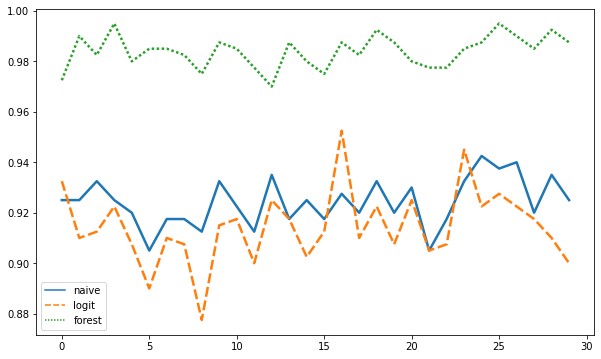

In [14]:
ax = plt.figure(figsize=(10,6))
sns.lineplot(data=dataset, palette="tab10", linewidth=2.5)

# Cross Validation

In [20]:
result_naive = []
result_logit = []
result_forest = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state = i)

    naive = GaussianNB()
    scores = cross_val_score(naive, X, y, cv = kfold)
    result_naive.append(scores.mean())

    logit = LogisticRegression()
    scores = cross_val_score(logit, X, y, cv = kfold)
    result_logit.append(scores.mean())

    forest = RandomForestClassifier()
    scores = cross_val_score(forest, X, y, cv = kfold)
    result_forest.append(scores.mean())

In [21]:
dataset = pd.DataFrame(list(zip(result_naive, result_logit, result_forest)),
                  columns = ['naive','logit', 'forest'])

In [22]:
dataset

,naive,logit,forest
0,0.924862,0.911372,0.983470
1,0.924917,0.910367,0.985982
2,0.924889,0.918359,0.984982
3,0.922882,0.915877,0.985967
4,0.924872,0.913342,0.988485
5,0.925389,0.910872,0.986485
6,0.924384,0.918837,0.987475
7,0.924889,0.918897,0.987985
8,0.924872,0.913357,0.986975
9,0.923889,0.914869,0.985980


In [23]:
dataset.describe()

,naive,logit,forest
count,30.000000,30.000000,30.000000
mean,0.924936,0.913782,0.987064
std,0.000813,0.003606,0.001589
min,0.922882,0.909844,0.983470
25%,0.924517,0.910861,0.985980
50%,0.924892,0.913098,0.986979
75%,0.925389,0.915872,0.988482
max,0.926384,0.921362,0.989992


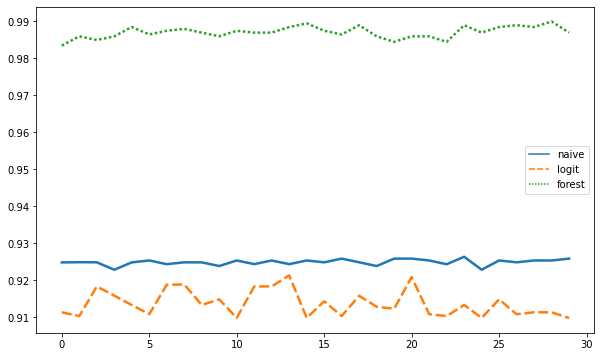

In [24]:
ax = plt.figure(figsize=(10,6))
sns.lineplot(data=dataset, palette="tab10", linewidth=2.5)